<a href="https://colab.research.google.com/github/Liths-12/uom-ai-sessions-2025/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a regression model to predict house prices using the dataset at "/content/Housing.csv", evaluate its performance, visualize the results, and save the notebook to GitHub.

## Load the data

### Subtask:
Load the Housing.csv file into a pandas DataFrame.


**Reasoning**:
Import pandas, load the CSV file into a DataFrame, and display the head and info.



In [1]:
import pandas as pd

df = pd.read_csv('/content/Housing.csv')
display(df.head())
display(df.info())

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


None

## Explore the data

### Subtask:
Perform exploratory data analysis (EDA) to understand the dataset, including checking for missing values, analyzing feature distributions, and visualizing relationships between features and the target variable (price).


**Reasoning**:
Display descriptive statistics, unique value counts, and unique values for object type columns to understand the dataset's characteristics.



In [2]:
display(df.describe())
display(df.nunique())

object_cols = df.select_dtypes(include='object').columns
for col in object_cols:
    display(f"Unique values for '{col}': {df[col].unique()}")

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


,0
price,219
area,284
bedrooms,6
bathrooms,4
stories,4
mainroad,2
guestroom,2
basement,2
hotwaterheating,2
airconditioning,2


"Unique values for 'mainroad': ['yes' 'no']"

"Unique values for 'guestroom': ['no' 'yes']"

"Unique values for 'basement': ['no' 'yes']"

"Unique values for 'hotwaterheating': ['no' 'yes']"

"Unique values for 'airconditioning': ['yes' 'no']"

"Unique values for 'prefarea': ['yes' 'no']"

"Unique values for 'furnishingstatus': ['furnished' 'semi-furnished' 'unfurnished']"

**Reasoning**:
Visualize the distribution of the target variable 'price' and the relationship between 'price' and numerical features.



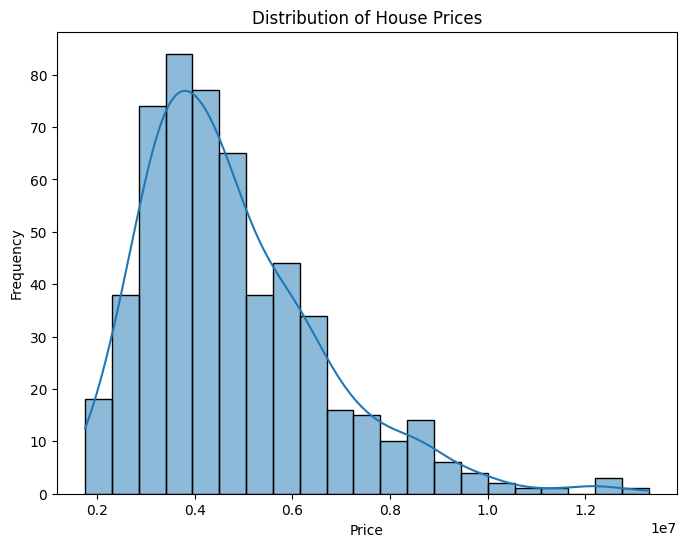

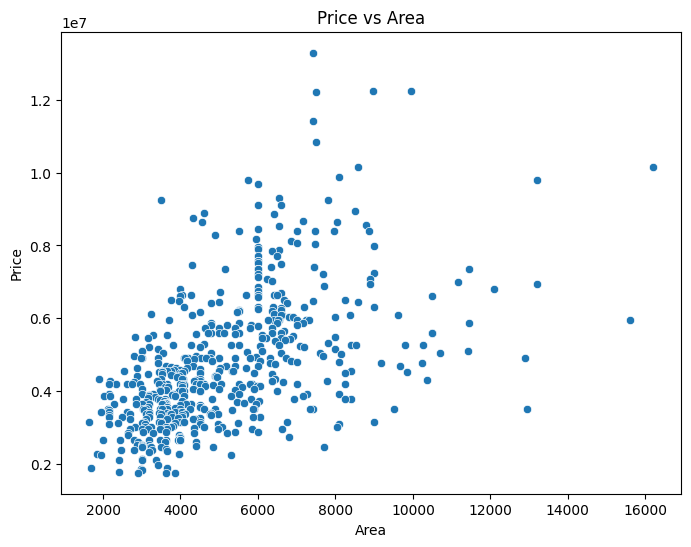

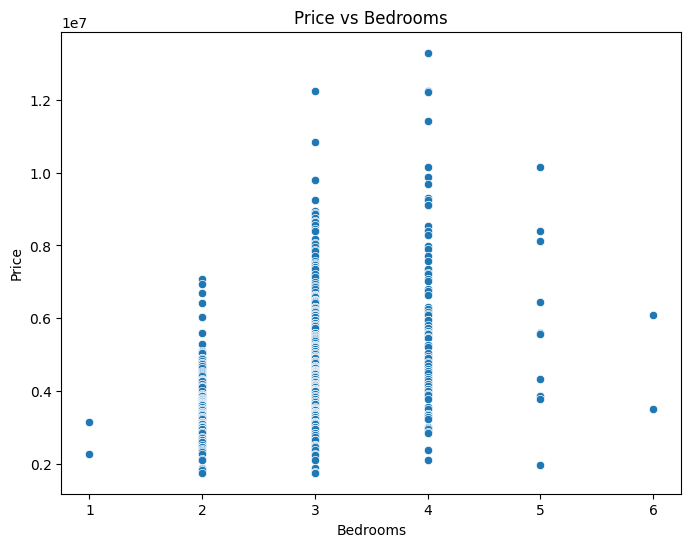

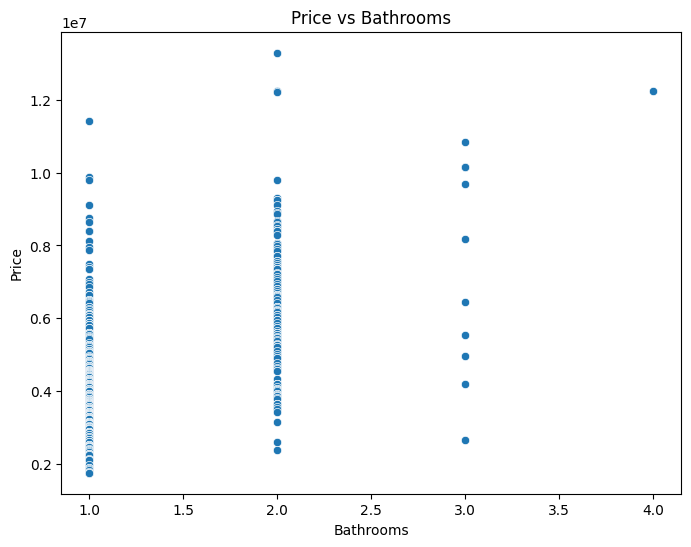

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

numerical_features = ['area', 'bedrooms', 'bathrooms']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['price'])
    plt.title(f'Price vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
    plt.show()

**Reasoning**:
Visualize the relationship between the target variable 'price' and categorical features using box plots.



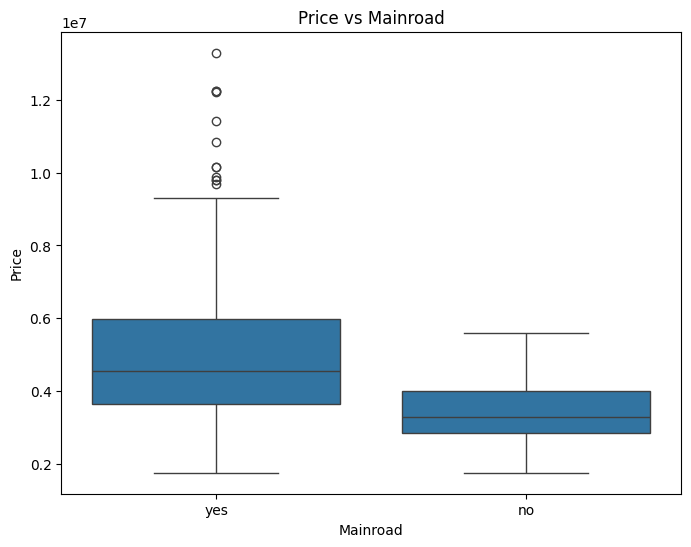

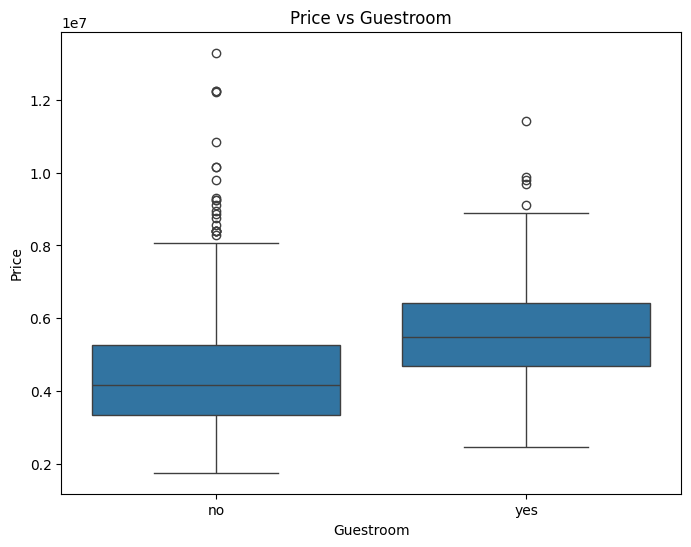

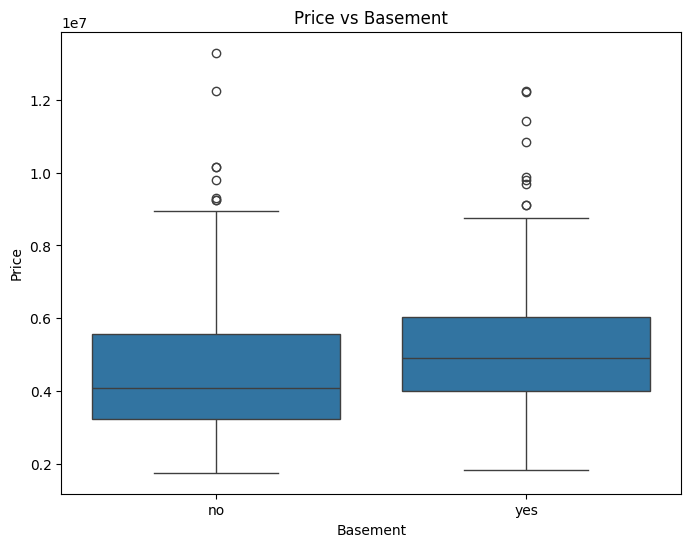

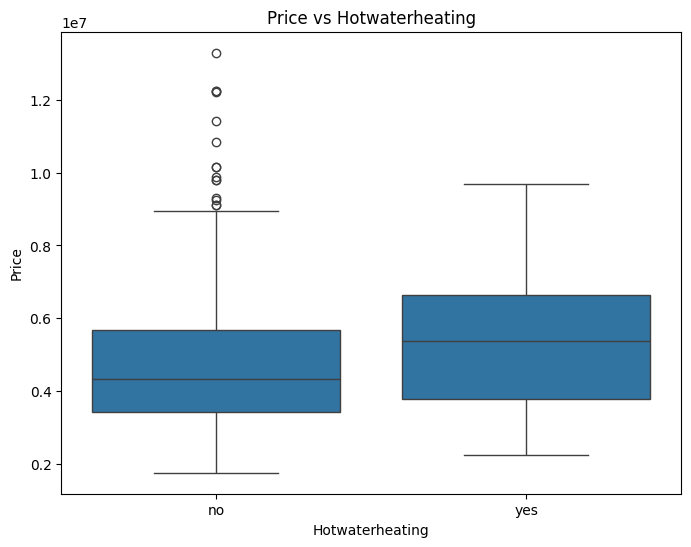

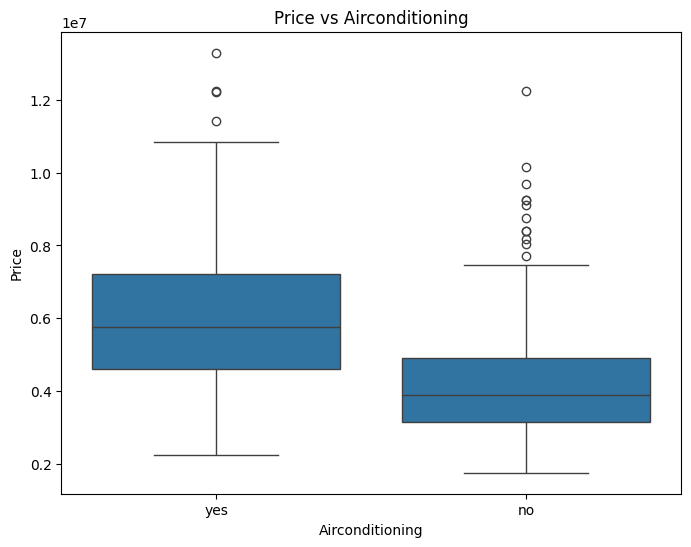

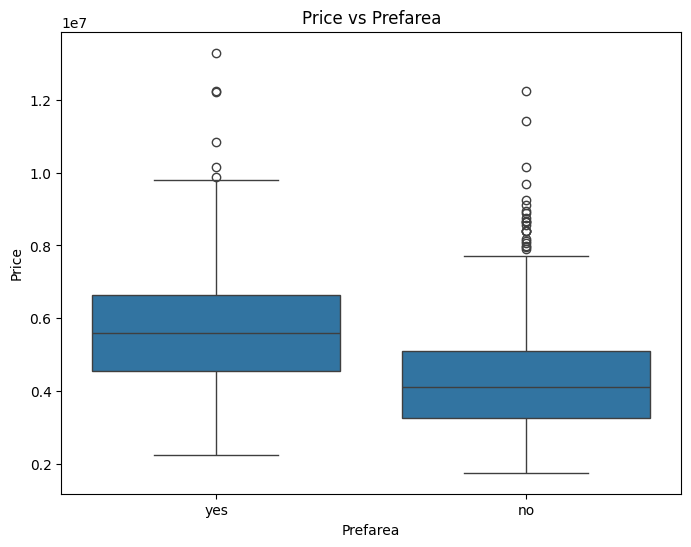

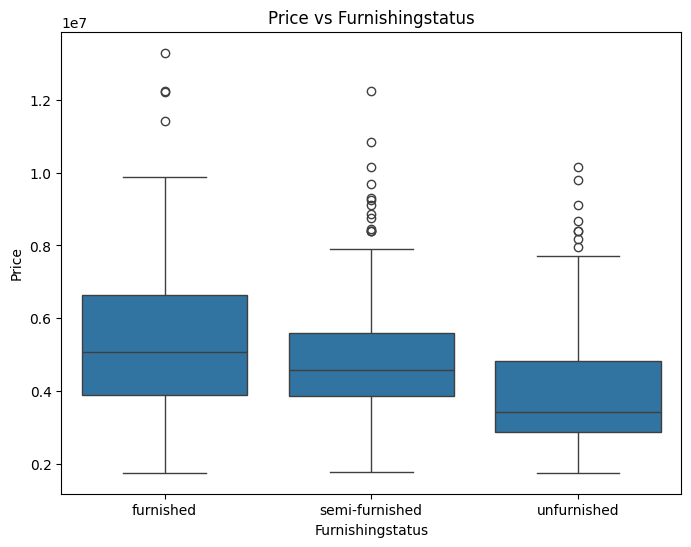

In [4]:
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], y=df['price'])
    plt.title(f'Price vs {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Price')
    plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical features, and scale numerical features if necessary. Split the data into training and testing sets.


**Reasoning**:
Based on the previous EDA, there are no missing values. The categorical features need to be encoded and the numerical features need to be scaled. Then, the data needs to be split into training and testing sets. These steps can be combined into a single code block.



In [5]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np

# Identify categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=np.number).columns.drop('price') # Exclude the target variable

# Create transformers for one-hot encoding and scaling
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Keep other columns (like price)
)

# Separate features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Apply preprocessing
X_processed = preprocessor.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(436, 20)

(109, 20)

(436,)

(109,)

## Build the regression model

### Subtask:
Choose and train a regression model (e.g., Linear Regression, Ridge, Lasso, or a more complex model like RandomForestRegressor or GradientBoostingRegressor).


**Reasoning**:
Import the Linear Regression model, instantiate it, and train it using the training data.



In [6]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

### Subtask:
Evaluate the model's performance using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.


**Reasoning**:
Calculate and print the evaluation metrics for the trained model.



In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")

Mean Absolute Error (MAE): 970043.4039201644
Mean Squared Error (MSE): 1754318687330.669
Root Mean Squared Error (RMSE): 1324506.9600914405
R-squared (R2) Score: 0.6529242642153175


## Visualize the results

### Subtask:
Visualize the model's predictions versus the actual prices and plot the residuals to assess the model's performance.


**Reasoning**:
Create scatter plots to visualize the actual vs. predicted prices and the residuals, and display the plots.



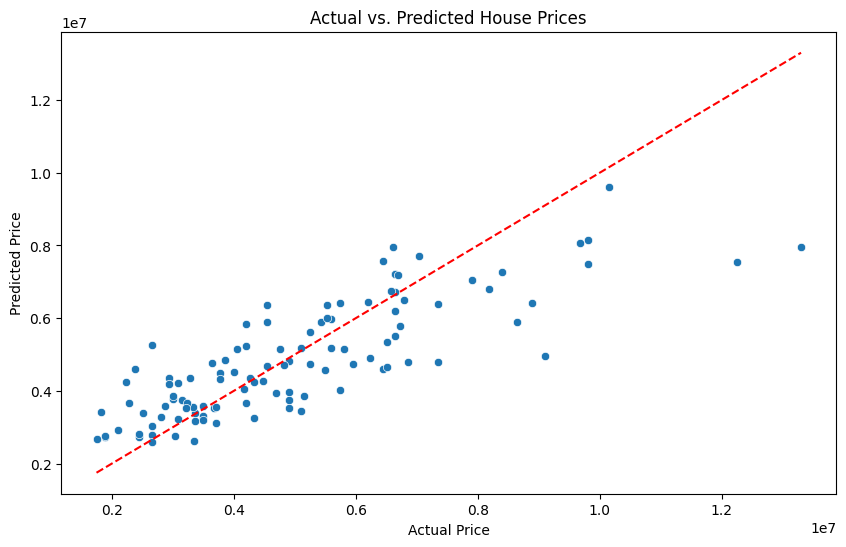

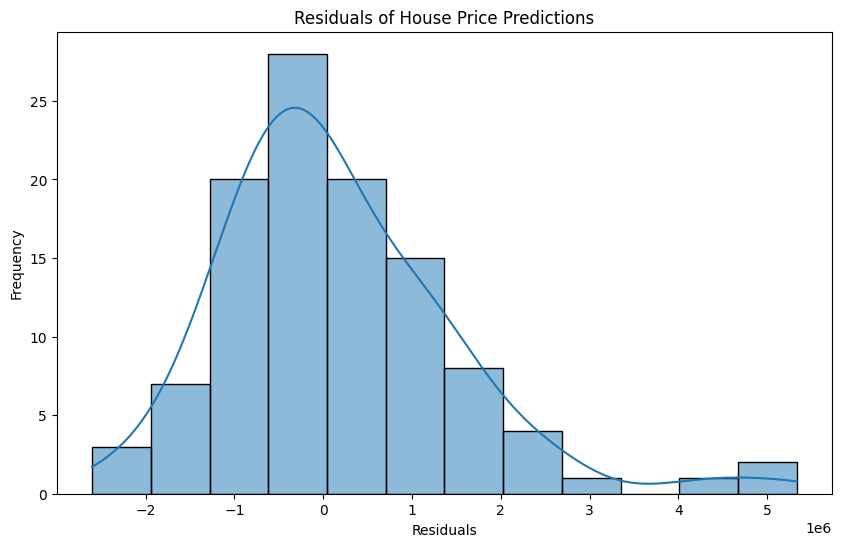

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted House Prices")
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals of House Price Predictions")
plt.show()

## Save the notebook

### Subtask:
Save the notebook to your Google Drive.


## Connect to github

### Subtask:
Connect your Colab notebook to GitHub.


## Commit and push to github

### Subtask:
Save a copy of your notebook to GitHub.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 545 entries and 13 columns, including numerical features like `price`, `area`, and categorical features such as `mainroad` and `furnishingstatus`. No missing values were found.
*   The distribution of house prices is right-skewed.
*   Numerical features like `area`, `bedrooms`, and `bathrooms` show a positive correlation with `price`. `area` exhibits the strongest relationship.
*   Categorical features such as `mainroad`, `guestroom`, `basement`, `airconditioning`, and `prefarea`, as well as 'furnished' and 'semi-furnished' status, are associated with higher median house prices.
*   A Linear Regression model was trained to predict house prices.
*   The model's performance on the test set resulted in an MAE of approximately \$970,043, an MSE of about \$1.75 trillion, an RMSE of around \$1,324,507, and an R-squared score of approximately 0.653.
*   Visualizations show that the model's predictions generally align with actual prices, and the residuals are somewhat normally distributed around zero.

### Insights or Next Steps

*   The R-squared score of 0.653 indicates that the model explains a reasonable portion of the variance in house prices, but there is room for improvement. Exploring more complex models or feature engineering could potentially increase the R-squared.
*   Further analysis of residuals could reveal potential areas where the model struggles, such as underpredicting high-priced houses or overpredicting low-priced ones, guiding further model refinement.
